## Importing necessary Libraries

In [121]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter

### Merging 12 months of data into a single csv file

In [11]:
#Read single file from the directory
df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")

In [8]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [17]:
#List all files present in the directory

files = [file for file in os.listdir("./Sales_Data/")]

for file in files:
    print(file)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [22]:
#Merging all files into single dataframe

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data, df])

all_months_data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [23]:
#Converting Dataframe to csv file

all_months_data.to_csv("all_datas.csv", index=False)

### Reading the all data csv fille

In [24]:
all_data = pd.read_csv("all_datas.csv")

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Segregating the month column

In [27]:
all_data['Month'] = all_data['Order Date'].str[0:2]

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04


In [35]:
# Notice there are NaN(null) values. Need to drop the null values from the dataframe.
all_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
Month               545
dtype: int64

In [36]:
nan_data = all_data[all_data.isna().any(axis=1)]

nan_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
# Dropping all null values from the dataframe.

all_data = all_data.dropna(how='all')

In [40]:
all_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
dtype: int64

In [44]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


## Cleaning the data

In [45]:
# In Order Date column we have entries with 'Or' value
temp_df = all_data[all_data['Order Date'].str[0:2] == 'Or']

temp_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


In [51]:
# Cleaning the 'Or' values in the Order Date column

all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

all_data.sample(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
8563,184737,AA Batteries (4-pack),2,3.84,04/07/19 00:33,"956 9th St, Dallas, TX 75001",04
41034,305814,AA Batteries (4-pack),1,3.84,12/25/19 14:11,"908 Wilson St, San Francisco, CA 94016",12
93095,211303,AA Batteries (4-pack),1,3.84,06/24/19 09:49,"956 Park St, San Francisco, CA 94016",06
172272,276035,Lightning Charging Cable,1,14.95,10/21/19 17:56,"272 Willow St, San Francisco, CA 94016",10
11281,187329,AAA Batteries (4-pack),1,2.99,04/10/19 14:09,"182 Cedar St, San Francisco, CA 94016",04
45408,310004,ThinkPad Laptop,1,999.99,12/04/19 16:57,"512 Jackson St, San Francisco, CA 94016",12
156469,260957,34in Ultrawide Monitor,1,379.99,10/02/19 09:56,"43 Highland St, Dallas, TX 75001",10
10864,186928,Lightning Charging Cable,1,14.95,04/28/19 09:33,"687 10th St, San Francisco, CA 94016",04
16128,191945,Apple Airpods Headphones,1,150,04/08/19 15:59,"384 12th St, Atlanta, GA 30301",04
140618,282144,AAA Batteries (4-pack),1,2.99,11/18/19 21:31,"476 Park St, New York City, NY 10001",11


In [54]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month               object
dtype: object

### Converting columns to appropriate data type

In [58]:
all_data['Month'] = all_data['Month'].astype('int32')

all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month                int32
dtype: object

In [59]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [61]:
#pd.to_numeric helps to convert numeric data values to it respective type

all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered']) #converts to int

all_data['Price Each'] = pd.to_numeric(all_data['Price Each']) #converts to float

all_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int32
dtype: object

### Adding the sales column

In [62]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [64]:
#Sortng the dataframe as Sales column

all_data.sort_values(by=['Sales'], ascending = False)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
127265,200528,Macbook Pro Laptop,2,1700.00,05/13/19 13:40,"643 4th St, Boston, MA 02215",5,3400.00
92026,210292,Macbook Pro Laptop,2,1700.00,06/08/19 09:00,"953 Ridge St, San Francisco, CA 94016",6,3400.00
4717,181069,Macbook Pro Laptop,2,1700.00,04/27/19 21:01,"668 Park St, San Francisco, CA 94016",4,3400.00
5219,181544,Macbook Pro Laptop,2,1700.00,04/22/19 12:48,"731 11th St, New York City, NY 10001",4,3400.00
174998,278637,ThinkPad Laptop,2,999.99,10/02/19 16:06,"643 Cedar St, Boston, MA 02215",10,1999.98
...,...,...,...,...,...,...,...,...
161398,265671,AAA Batteries (4-pack),1,2.99,10/15/19 21:15,"166 Meadow St, Atlanta, GA 30301",10,2.99
61684,156382,AAA Batteries (4-pack),1,2.99,02/21/19 20:00,"944 Jackson St, Los Angeles, CA 90001",2,2.99
61687,156385,AAA Batteries (4-pack),1,2.99,02/02/19 22:33,"961 6th St, Los Angeles, CA 90001",2,2.99
61689,156387,AAA Batteries (4-pack),1,2.99,02/16/19 16:17,"950 Pine St, Dallas, TX 75001",2,2.99


### Adding a city column

In [86]:
# using the .apply()
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]


all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")

all_data.sample(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
33155,298299,ThinkPad Laptop,1,999.99,12/21/19 12:28,"158 Washington St, Los Angeles, CA 90001",12,999.99,Los Angeles (CA)
123580,197026,Flatscreen TV,1,300.00,05/04/19 12:59,"577 8th St, Dallas, TX 75001",5,300.00,Dallas (TX)
61129,155858,AAA Batteries (4-pack),1,2.99,02/23/19 13:14,"854 South St, Boston, MA 02215",2,2.99,Boston (MA)
55008,319188,20in Monitor,1,109.99,12/08/19 13:16,"884 Cherry St, San Francisco, CA 94016",12,109.99,San Francisco (CA)
30571,295826,USB-C Charging Cable,1,11.95,12/07/19 14:18,"765 Washington St, San Francisco, CA 94016",12,11.95,San Francisco (CA)
68203,141873,34in Ultrawide Monitor,1,379.99,01/19/19 19:12,"521 Ridge St, San Francisco, CA 94016",1,379.99,San Francisco (CA)
37971,302890,AA Batteries (4-pack),1,3.84,12/15/19 11:16,"728 Main St, Atlanta, GA 30301",12,3.84,Atlanta (GA)
173894,277584,20in Monitor,1,109.99,10/04/19 12:57,"820 Main St, Atlanta, GA 30301",10,109.99,Atlanta (GA)
148518,289679,Macbook Pro Laptop,1,1700.00,11/28/19 13:54,"714 Meadow St, San Francisco, CA 94016",11,1700.00,San Francisco (CA)
103728,221454,Apple Airpods Headphones,1,150.00,06/30/19 12:42,"887 12th St, Boston, MA 02215",6,150.00,Boston (MA)


### Adding Order Time column from Order Date column

In [97]:
#The Order Date column gives the information about time when orders are made. So we need to convert the Order Date(str) to datetime type

all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [100]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


### Adding Group column for products ordered together

In [116]:
# The OrderID column with same values show the products are sold together.
# Creating new Dataframe with the duplicate values of OrderID column

df1 = all_data[all_data['Order ID'].duplicated(keep=False)] #keeping the duplicate values

df1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),19,42
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (CA),19,42
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,31


In [117]:
#adding new column 'Grouped' for products ordered together

df1['Grouped'] = df1.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df1.head()

<ipython-input-117-8ce89e152d52>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Grouped'] = df1.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),19,42,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (CA),19,42,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [120]:
#Removing the duplicate values of 'Grouped' column and filtering the dataframe to required data

df1 = df1[['Order ID', 'Grouped']].drop_duplicates()

df1.head(10)

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
129,176681,"Apple Airpods Headphones,ThinkPad Laptop"
138,176689,"Bose SoundSport Headphones,AAA Batteries (4-pack)"
189,176739,"34in Ultrawide Monitor,Google Phone"
225,176774,"Lightning Charging Cable,USB-C Charging Cable"
233,176781,"iPhone,Lightning Charging Cable"


## Analyzing the data

### Best month for sales and how much was earned?

In [92]:
results = all_data.groupby('Month').sum()

results.head(12)

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


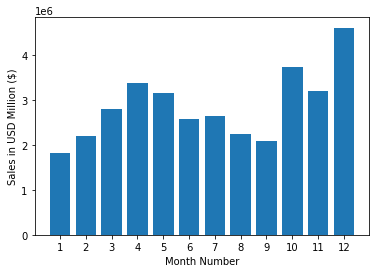

In [93]:
months = range(1,13)

plt.bar(months, results['Sales'])
plt.xticks(months)
plt.xlabel('Month Number')
plt.ylabel('Sales in USD Million ($)')
plt.show()

##### The best month for sales was December and earnings was $4.6 million

### City had the highest number of sales?

In [94]:
results = all_data.groupby('City').sum()

results

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2.779908e+06,104794,2.795499e+06
Austin (TX),11153,1.809874e+06,69829,1.819582e+06
Boston (MA),22528,3.637410e+06,141112,3.661642e+06
Dallas (TX),16730,2.752628e+06,104620,2.767975e+06
Los Angeles (CA),33289,5.421435e+06,208325,5.452571e+06
New York City (NY),27932,4.635371e+06,175741,4.664317e+06
Portland (ME),2750,4.471893e+05,17144,4.497583e+05
Portland (OR),11303,1.860558e+06,70621,1.870732e+06
San Francisco (CA),50239,8.211462e+06,315520,8.262204e+06


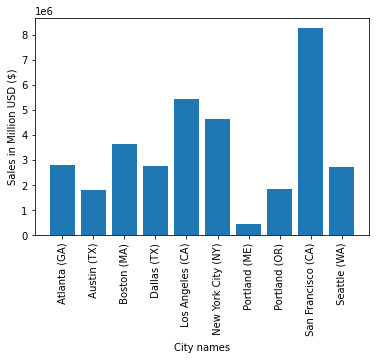

In [95]:
cities = [city for city, df in all_data.groupby('City')]


plt.bar(cities, results['Sales'])
plt.xticks(cities, rotation='vertical', size=10)
plt.xlabel('City names')
plt.ylabel('Sales in Million USD ($)')
plt.show()

###### The city with the highest number of sales is San Francisco (CA).

### Time to display the advertisements to maximize the likelihood of customer's buying product?

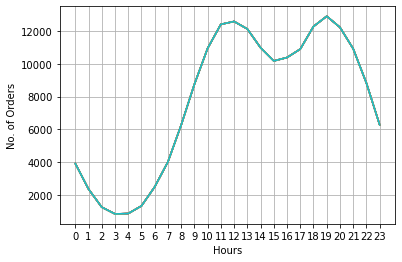

In [105]:
hours = [hour for hour, df in all_data.groupby('Hour')]

plt.plot(hours, all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Hours')
plt.ylabel('No. of Orders')
plt.grid()
plt.show()

###### As per the above analysis, best time to advertise would be 11am-12noon and 6pm-7pm(18:00-19:00 hrs)

### Products often sold together?

In [124]:
# We will use the df1 dataframe. Also use the count and combination libraries.

count = Counter()

for row in df1['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2))) #counting products where 2 items were sold together

print(count)

Counter({('iPhone', 'Lightning Charging Cable'): 1005, ('Google Phone', 'USB-C Charging Cable'): 987, ('iPhone', 'Wired Headphones'): 447, ('Google Phone', 'Wired Headphones'): 414, ('Vareebadd Phone', 'USB-C Charging Cable'): 361, ('iPhone', 'Apple Airpods Headphones'): 360, ('Google Phone', 'Bose SoundSport Headphones'): 220, ('USB-C Charging Cable', 'Wired Headphones'): 160, ('Vareebadd Phone', 'Wired Headphones'): 143, ('Lightning Charging Cable', 'Wired Headphones'): 92, ('Lightning Charging Cable', 'Apple Airpods Headphones'): 81, ('Vareebadd Phone', 'Bose SoundSport Headphones'): 80, ('USB-C Charging Cable', 'Bose SoundSport Headphones'): 77, ('Apple Airpods Headphones', 'Wired Headphones'): 69, ('Lightning Charging Cable', 'USB-C Charging Cable'): 58, ('Lightning Charging Cable', 'AA Batteries (4-pack)'): 55, ('Lightning Charging Cable', 'Lightning Charging Cable'): 54, ('Bose SoundSport Headphones', 'Wired Headphones'): 53, ('AA Batteries (4-pack)', 'Lightning Charging Cable')

In [125]:
#the count does provide the list of products ordered together, but difficult to read the data

count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

In [128]:
#as it is in key-value pairs we can just extract to get key-value pairs

for key,value in count.most_common(10):
    print (key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


##### counting products where 3 items were sold together

In [131]:
count1 = Counter()

for row in df1['Grouped']:
    row_list = row.split(',')
    count1.update(Counter(combinations(row_list, 3)))

print(count1)

Counter({('Google Phone', 'USB-C Charging Cable', 'Wired Headphones'): 87, ('iPhone', 'Lightning Charging Cable', 'Wired Headphones'): 62, ('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones'): 47, ('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones'): 35, ('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones'): 33, ('iPhone', 'Apple Airpods Headphones', 'Wired Headphones'): 27, ('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones'): 24, ('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones'): 16, ('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones'): 5, ('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones'): 5, ('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones'): 4, ('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)'): 3, ('iPhone', 'Lightning Charging Cable', 'Lightning Charging Cable'): 3, ('iPhone', 'Lightning Charging Cable', 'AA Batteries (4

In [132]:
for key,value in count1.most_common(10):
    print (key,value)

('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 87
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 62
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 47
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 33
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 27
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 24
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5


###### As per the above analysis : 'iPhone', 'Lightning Charging Cable' & 'Google Phone', 'USB-C Charging Cable', 'Wired Headphones' are the most sold items(2 & 3) sold together. 

###### The shop owners can thus group the products and sell them together or provide discounts and can promote them on advertisements as it is most sold products

### Product sold the most, why it did ?

In [133]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


In [150]:
#Grouping product data

product_group = all_data.groupby('Product')
product_group.head(20)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27
...,...,...,...,...,...,...,...,...,...,...,...
3963,180359,LG Dryer,1,600.00,2019-04-03 15:17:00,"20 Ridge St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),15,17
3998,180391,LG Washing Machine,1,600.00,2019-04-06 14:11:00,"979 Lakeview St, San Francisco, CA 94016",4,600.00,San Francisco (CA),14,11
4006,180398,LG Dryer,1,600.00,2019-04-18 03:10:00,"684 9th St, San Francisco, CA 94016",4,600.00,San Francisco (CA),3,10
4284,180659,LG Washing Machine,1,600.00,2019-04-25 14:35:00,"434 Cherry St, San Francisco, CA 94016",4,600.00,San Francisco (CA),14,35


In [151]:
quantity_ordered = product_group.sum()['Quantity Ordered']

quantity_ordered.head()

Product
20in Monitor               4129
27in 4K Gaming Monitor     6244
27in FHD Monitor           7550
34in Ultrawide Monitor     6199
AA Batteries (4-pack)     27635
Name: Quantity Ordered, dtype: int64

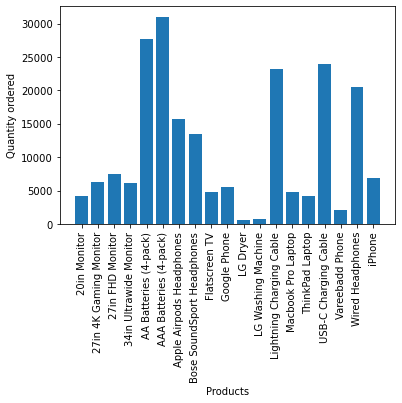

In [153]:
products = [product for product, df in product_group]


plt.bar(products, quantity_ordered)
plt.xticks(products, rotation='vertical', size=10)
plt.xlabel('Products')
plt.ylabel('Quantity ordered')
plt.show()

###### By above analysis 'AAA Batteries' and 'AA Batteries' are most sold products.

In [157]:
#Finding the prices of each product.

prices = all_data.groupby('Product').mean()['Price Each']

prices.head()

Product
20in Monitor              109.99
27in 4K Gaming Monitor    389.99
27in FHD Monitor          149.99
34in Ultrawide Monitor    379.99
AA Batteries (4-pack)       3.84
Name: Price Each, dtype: float64

<ipython-input-160-a0122b15b8bf>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=10)


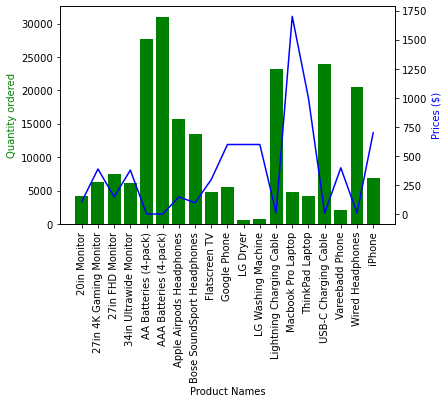

In [160]:
#Plotting second y-axis (prices) on products graph. Compare quanitity ordered with prices of each products

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product Names')
ax1.set_ylabel('Quantity ordered', color='g')
ax2.set_ylabel('Prices ($)', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=10)

plt.show()

##### By above analysis, we see correlation between the prices and quantity ordered. Where prices are lower the products are ordered the most.